In [12]:
import pandas as pd
# https://ecobici.cdmx.gob.mx/datos-abiertos/
files = ["2025-02", "2025-01", "2024-12", "2024-11", "2024-10", "2024-09", "2024-08"]
list_df = []
for f in files:
    list_df.append(
        pd.read_csv(f'/mnt/c/Users/jjsan/Downloads/{f}.csv', usecols=["Bici"])
        .assign(periodo=f)
        )
bicis = pd.concat(list_df, ignore_index=True)
n_bicis = bicis.groupby("periodo")["Bici"].nunique().sort_index()
n_bicis

periodo
2024-08    8199
2024-09    8153
2024-10    8108
2024-11    7976
2024-12    7745
2025-01    7500
2025-02    7296
Name: Bici, dtype: int64

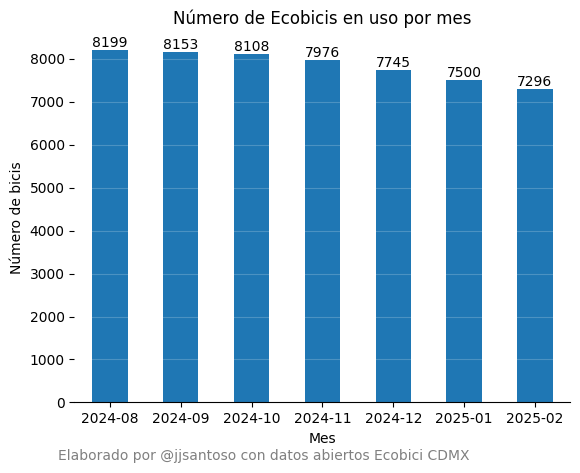

In [34]:
ax = n_bicis.plot.bar()
ax.bar_label(ax.containers[0])
ax.yaxis.grid(True, alpha=0.2, color="white")
ax.set_ylabel("Número de bicis")
ax.set_xlabel("Mes")
ax.set_title("Número de Ecobicis en uso por mes")
ax.set_xticklabels(n_bicis.index, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.figure.text(0.1, -0.01, "Elaborado por @jjsantoso con datos abiertos Ecobici CDMX", color="gray", ha="left")
ax.figure.savefig("images/n_ecobicis_202408_202502.png", bbox_inches="tight", dpi=300)

In [46]:
bicis.groupby(["periodo", "Bici"])["Bici"].count().unstack(level=0).describe().round(0)#.plot.bar()

periodo,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02
count,8199.0,8153.0,8108.0,7976.0,7745.0,7500.0,7296.0
mean,231.0,227.0,253.0,244.0,217.0,241.0,239.0
std,64.0,60.0,78.0,84.0,73.0,94.0,97.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,193.0,190.0,215.0,201.0,181.0,187.0,179.0
50%,229.0,222.0,261.0,254.0,226.0,261.0,260.0
75%,272.0,262.0,302.0,296.0,262.0,308.0,311.0
max,424.0,438.0,479.0,512.0,428.0,467.0,472.0
